In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Example of getting comments from post

In [4]:
link= "https://www.reddit.com/r/AskReddit/comments/jz2oij/what_was_something_you_thought_would_be_easy/"
# query= input('Enter subreddit name: ')

In [5]:
content= requests.get(link).text

In [6]:
len(content)

1006196

In [8]:
soup= BeautifulSoup(content, "html.parser")

In [12]:
post_title= soup.find_all('h1')[0].text

In [20]:
my_distinct_comments= set()
temp= soup.find_all('div')
for i in temp:
    comments= i.find_all('p')
    for comment in comments:
        my_distinct_comments.add(comment.text)

In [21]:
len(my_distinct_comments)

24

In [22]:
my_distinct_comments

{'"Playing the guitar is so hard, if I didn\'t see other people playing I wouldn\'t believe it were possible."',
 '119 more replies',
 '246 more replies',
 '34 more replies',
 "A lot of the parts from that Ninja Warrior show. I'm a very physically fit guy and always thought that first course looked like a breeze.",
 'A pretty accurate description, from when I made the switch.',
 'Haha I started running Spartan Races at age 42.  It’s not ninja warrior stuff, but even simple things like monkey bars are MUCH harder when you weigh 180 lbs vs the last time I’d done them and weighed, like 60 pounds!',
 'Has anyone tried to learn to do a handstand as an adult? How is that SO DIFFICULT',
 'I have really small hands so the hardest part for me was building strength in my hands and fingers. I never was able to build callouses on my fingertips, so practicing always hurt so, so much. And playing through even one song from start to finish was so painful, I often had to stop partway through and give 

## Getting title of posts from said subreddit

In [23]:
link= 'https://www.reddit.com/r/AskReddit/'

In [24]:
content= requests.get(link).text

In [25]:
soup= BeautifulSoup(content, "html.parser")

In [27]:
soup.find_all('h3')

[<h3 class="_eYtD2XCVieq6emjKBH3m">Moratorium on questions related to US Politics</h3>,
 <h3 class="_eYtD2XCVieq6emjKBH3m">What is a history fact that is so stupid it doesn't seem real?</h3>,
 <h3 class="_eYtD2XCVieq6emjKBH3m">What was something you thought would be easy, until you tried it?</h3>,
 <h3 class="_eYtD2XCVieq6emjKBH3m">Ex-Millionaires of Reddit, what made you lose all your money?</h3>,
 <h3 class="_eYtD2XCVieq6emjKBH3m">What do you think “pspspspspspsps” really means to a cat?</h3>]

## As we can see it is returning only limited titles. Let's use selenium to scroll

In [40]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [61]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}    # Block Notifications, popups
chrome_options.add_experimental_option("prefs",prefs)
# browser = webdriver.Chrome(chrome_options=chrome_options)


browser = webdriver.Chrome(
    "/home/atharva/Downloads/chromedriver_linux64/chromedriver", chrome_options=chrome_options)

browser.get(link)    # open browser

start_time= time.time()    # start_time to scroll

titles_set= set()    # empty set to store unique titles

while True:          # scroll the subreddit page
    body= browser.find_element_by_tag_name('body')
    body.send_keys(Keys.PAGE_DOWN)
    if time.time() - start_time > 15:
        break

time.sleep(5)        # wait for page to load properly

links= browser.find_elements_by_tag_name('h3')    # find titles

for i in links:      # add to set
    titles_set.add(i.text)

/home/atharva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [63]:
len(titles_set)

49

In [64]:
titles_set

{'',
 'Anti-vaxxers of Reddit, are you against medicine as a whole and if not, what’s so wrong about a vaccination compared to ingesting medicine?',
 'Decorate your life with the Reddit Gifts Ornaments gift exchange!',
 'Explore How To options today!',
 "Have you ever dressed up like a girl (if you're a man, boy if you're a woman) in school? How did it go?",
 'How can the themes from George Orwell’s Animal Farm be applied to society today?',
 'How do you cure the urge to snuggle and cuddle when you have nobody?',
 'If life is a videogame, which experience has given you more exp?',
 'If reddit was in a war what would each subreddit contribute?',
 'If you could bring back one youtube channel back , what would that channel be?',
 "Map out your workflow, from ideas to action. Build your second brain in an all-in-one collaboration tool with task lists, notes, and mind maps. Taskade is simple, flexible, and it's free for individuals and teams! 💬 + 🧠 + ✍️ = ✅",
 'Master Bladesmith. Now availa

In [65]:
from wordcloud import WordCloud, STOPWORDS

### Let us process word cloud without pre processing the data

In [67]:
list_titles= list(titles_set)

In [69]:
default=''
for i in list_titles:
    default+= i

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(default) 

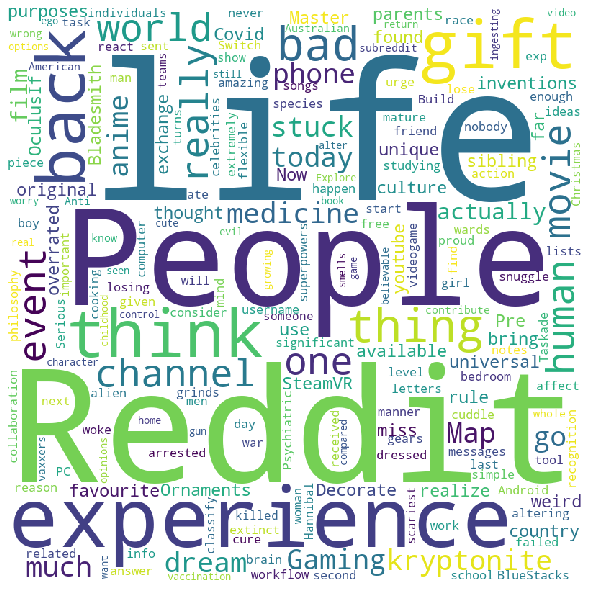

In [70]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 